In [1]:
# Installation of packages
%pip install datasets
%pip install matplotlib



[notice] A new release of pip is available: 24.2 -> 24.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Importation of libraries
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from datasets import load_from_disk
import os


In [3]:

current_dir = Path.cwd()
print(f"Current directory before change: {current_dir}")

# Verify the change
print(f"Current directory after change: {Path.cwd()}")




Current directory before change: /Users/jlbt/boa_workspace/NewsClassifier-BERT/model_dev/data/inshort_dataset
Current directory after change: /Users/jlbt/boa_workspace/NewsClassifier-BERT/model_dev/data/inshort_dataset


In [4]:
# Path to the cached Arrow dataset
file_path = '.'

# Load the dataset using the datasets library
dataset = load_from_disk(file_path)

# Convert the dataset to a Pandas DataFrame
df = dataset.to_pandas()

# Optionally, save to a CSV file
df.to_csv('rawdata.csv', index=False)

In [7]:
rawdata = pd.read_csv('rawdata.csv')
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  12120 non-null  object
 1   text    12120 non-null  object
dtypes: object(2)
memory usage: 189.5+ KB


In [8]:
rawdata.drop_duplicates()

,labels,text
0,technology,"After Musk tweets 'Use Signal', unrelated stoc..."
1,technology,Donald Trump permanently banned from Twitter T...
2,technology,Man finds father's image on Google Earth 7 yea...
3,technology,Bad sign: Mexican Prez after Trump's social me...
4,technology,Signal app registration system crashes after M...
...,...,...
11605,entertainment,I thank my trolls for keeping me relevant: Swa...
11608,entertainment,Veteran Bengali actor Monu Mukherjee passes aw...
11639,entertainment,"Tannaz Irani tests COVID-19 positive, says 'pr..."
11641,entertainment,His direction helps actors thrive: Deepika on ...


In [9]:
rawdata['labels'].unique().tolist()

['technology',
 'sports',
 'world',
 'politics',
 'entertainment',
 'automobile',
 'science']

In [10]:
rawdata['labels'].value_counts()

labels
world            2067
entertainment    2036
sports           1900
technology       1791
politics         1596
science          1437
automobile       1293
Name: count, dtype: int64

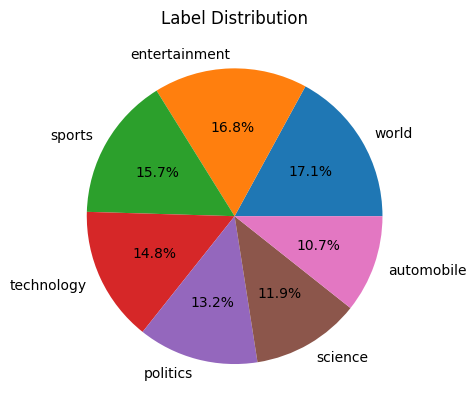

In [11]:
rawdata['labels'].value_counts().plot(kind='pie', autopct='%1.1f%%',ylabel='', title='Label Distribution',)
plt.show()

In [12]:
rawdata['labels'].value_counts().describe()

count       7.000000
mean     1731.428571
std       298.492243
min      1293.000000
25%      1516.500000
50%      1791.000000
75%      1968.000000
max      2067.000000
Name: count, dtype: float64

In [13]:
rawdata['word_count'] = rawdata['text'].apply(lambda x: len(x.split()))
print(rawdata['word_count'].describe())

count    12120.000000
mean        69.683333
std          3.104376
min         49.000000
25%         68.000000
50%         70.000000
75%         72.000000
max         79.000000
Name: word_count, dtype: float64


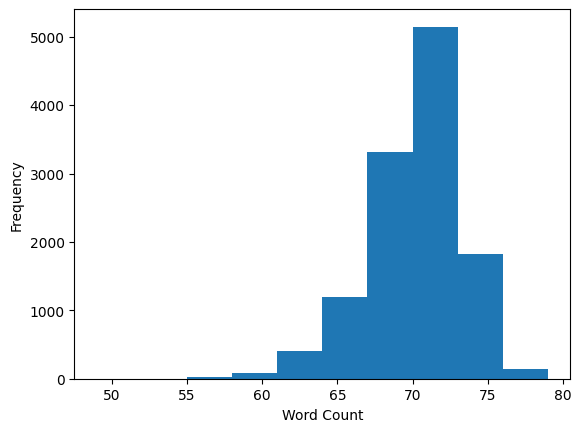

In [14]:
rawdata['word_count'].plot(kind='hist').set_xlabel('Word Count')
plt.show()

#### Clearly the dataset is a simple and already cleaned one, so there were no null values or duplicates, the dataset is a 12120 rows and  two column dataset with column names "labels" and "text". The label column corrsponds to the 7 news sections (technology, sports, world, politics, entertainment, automobile and lasstly science). The text column contains the news article or headline itself and a third column "word_count was created to display the number of words in the corresponding text column. The labels distributions was between 10% for automobile and 17% for world news, which makes a lot of sense in the context of the data. The average word count was 69 while the minimum and maximum were 49 and 79 words respectively. This means that the model would be trained with prompts not too little or too large.